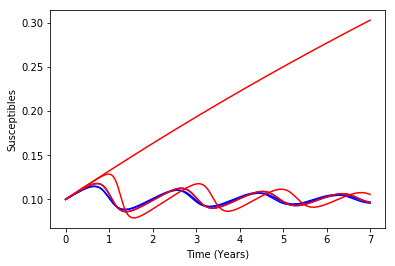

In [31]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pylab as plt


class Meta:
    def __init__(self, n, c):
        # define parameters
        self.n_pop = n
        self.beta = 1.0*np.ones(n)
        self.gamma = 0.1*np.ones(n)
        self.nu = 0.0001*np.ones(n)
        self.mu = 0.0001*np.ones(n)
        self.m = c*np.ones((n,n)) 
        self.mig_rate = self.m - np.diag(np.diag(self.m))

        # determine initial conditions
        self.X0 = 0.1*np.ones(n)
        self.Y0=0.0*np.ones(n)
        self.Y0[0]=0.0001

        # define time range
        n_days = 7 * 365
        self.t_range = np.arange(0, n_days, 1)
    
    
    def diff_eqs(self, inp, t):
        """
        Main set of equations in the SIR model with metapopulations. 
        """
        n = self.n_pop
        Y = np.zeros((2*n))
        V = inp

        for i in range(n):
            Y[i] = self.nu[i] - self.beta[i]*V[i]*V[n+i] - self.mu[i]*V[i]; 
            Y[n+i] = self.beta[i]*V[i]*V[n+i] - self.mu[i]*V[n+i] - self.gamma[i]*V[n+i]

            for j in range(n):
                Y[i] += self.mig_rate[i][j]*V[j] - self.mig_rate[j][i]*V[i];
                Y[n+i] += self.mig_rate[i][j]*V[n+j] - self.mig_rate[j][i]*V[n+i];
        return Y

# create Meta object with 2 subpopulations
values = [0.0, 0.0001, 0.1]
for value in values:
    meta = Meta(2,value)
    solution = spi.odeint(meta.diff_eqs, np.hstack((meta.X0,coupling.Y0)), meta.t_range)

    # plot results
    n = coupling.n_pop
    plt.plot(no_coupling.t_range/365.0, solution[:,0], color='blue')
    plt.plot(no_coupling.t_range/365.0, solution[:,1], color='red')
    plt.xlabel('Time (Years)')
    plt.ylabel('Susceptibles')
plt.show()

#     plt.plot(no_coupling.t_range/365.0, solution[:,0+n], color='blue')
#     plt.plot(no_coupling.t_range/365.0, solution[:,1+n], color='red')
#     plt.ylabel('Infected')
#     plt.xlabel('Time (Years)')
#     plt.show()